# **Facial Emotion Detection - Deep Learning Capstone**

The goal of this project was to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial expressions. For this project, I was asked to create various models: two basic CNN models, a Vgg16 model, a ResNetv2 model, and an EfficientNet model. Then I compared and contrasted accuracies to determine the best model I was able to create. 

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load and unzip the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

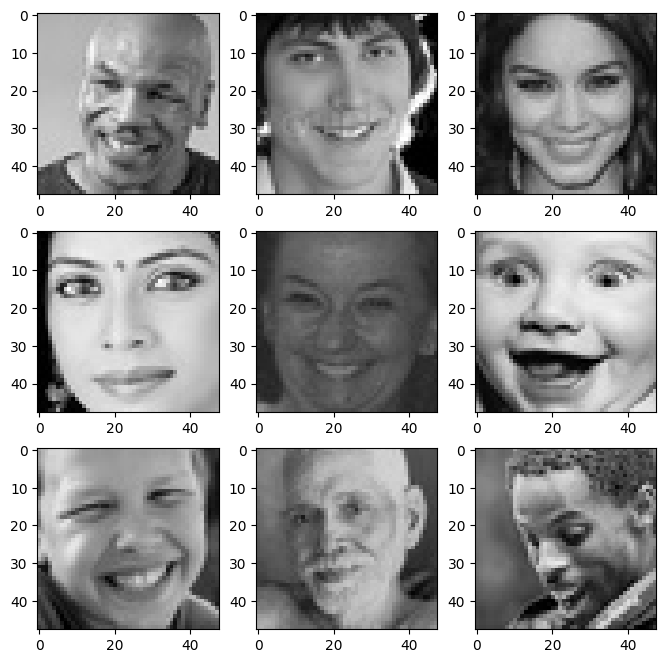

In [5]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
* Within the train dataset, these are some images flagged as "Happy". 
* The images have various orientations - some have a straight orientation and the others are at an angle. 
* There is also diversity in age, gender, and race, which will further help attune the model. 

### **Sad**

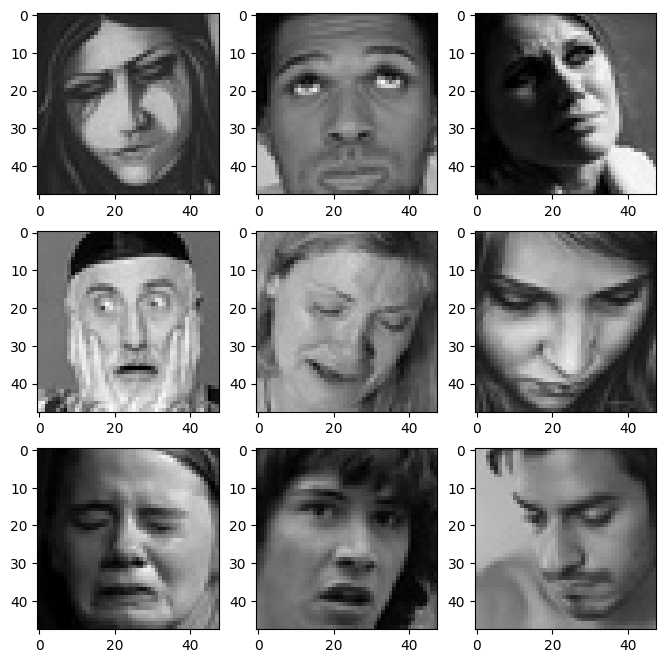

In [6]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
* Again, the images have various orientations - some have a straight orientation and the others are at an angle.
* There appears to be diversity in age, gender, and race here as well. 
* Some images are imperfect or have watermarks, as seen by the second and third images in the first row.  

### **Neutral**

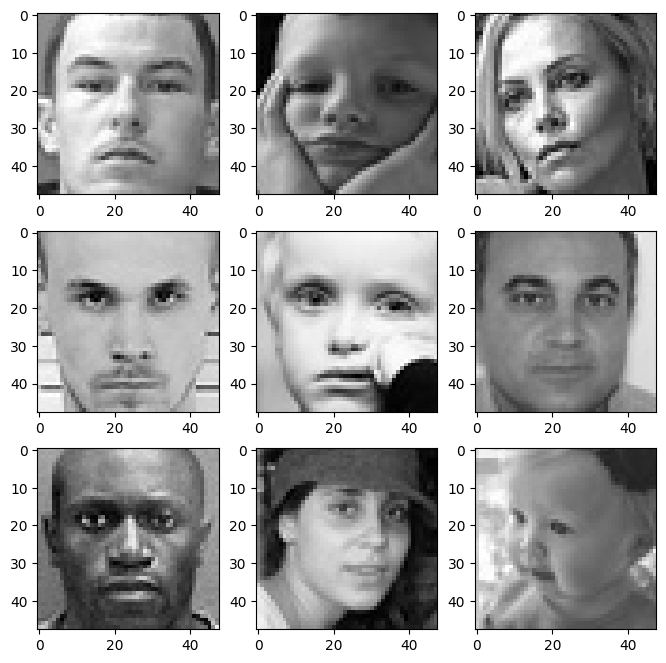

In [7]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
* There appears to be a painting depicted in this dataset (second row, third column)
* Yawning (third row, second column) has been flagged as "neutral", but could also indicate other emotions such as "bored". 

### **Surprised**

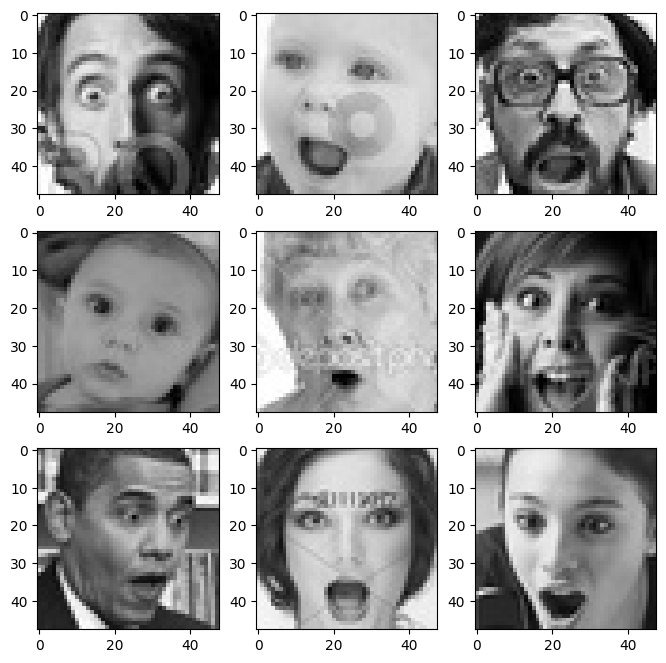

In [8]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
* Again, some of these images may portray "fear" as opposed to "surprised". Still, grouping them under one larger semantic category still helps delineate between larger categories of emotions. 

## **Checking Distribution of Classes**

In [9]:
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprised':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprised':    3173


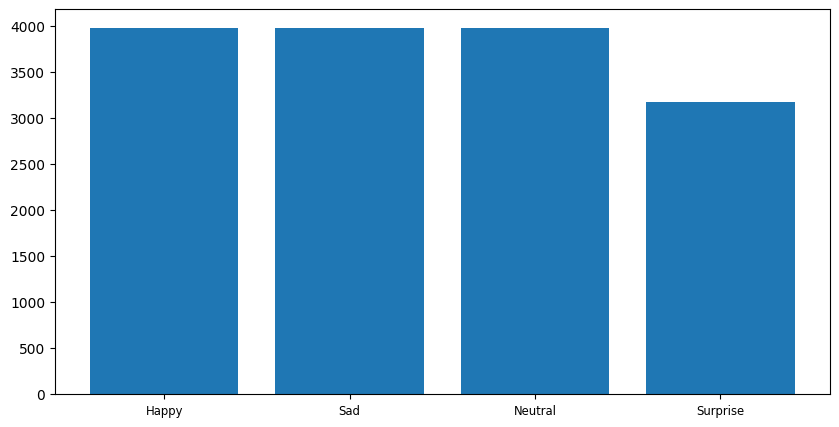

In [10]:
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:**
* There appears to be a largely even distribution of the image classes, with the exception of "Surprised", which has slightly fewer images. 

* Given that the discrepancy between "Surprised" vs. the other image classes is approximately 800, this will likely not be a problem with such a large dataset. However, as we build the model, it may be a factor to consider when evaluating model performance. 


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

**Note:**
After trying both 'rgb' and 'grayscale' color modes, the models performed better on 'grayscale'. Therefore, the I have shown performance for the models with the data loaders set to **grayscale.** 

In [11]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [12]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_train.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_train.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [13]:
# Create a Sequential model
model = Sequential()

# Add first Conv2D layer with 64 filters, kernel size of 2, and 'same' padding
model.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(48, 48, 1)))

# Add MaxPooling2D layer with pool size = 2
model.add(MaxPooling2D(pool_size=2))

# Add Dropout layer with a dropout ratio of 0.2
model.add(Dropout(0.2))

# Add second Conv2D layer with 32 filters, kernel size of 2, 'same' padding, and 'relu' activation
model.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))

# Add MaxPooling2D layer
model.add(MaxPooling2D(pool_size=2))

# Add Dropout layer with a dropout ratio of 0.2
model.add(Dropout(0.2))

# Add third Conv2D layer with 32 filters, kernel size of 2, 'same' padding, and 'relu' activation
model.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))

# Add MaxPooling2D layer
model.add(MaxPooling2D(pool_size=2))

# Add Dropout layer with a dropout ratio of 0.2
model.add(Dropout(0.2))

# Flatten the input
model.add(Flatten())

# Add first Dense layer with 512 neurons and 'relu' activation
model.add(Dense(512, activation='relu'))

# Add Dropout layer with a dropout ratio of 0.4
model.add(Dropout(0.4))

# Add final Dense layer with 4 neurons and 'softmax' activation
model.add(Dense(4, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### **Compiling and Training the Model**

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [15]:
# Compile the Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

In [16]:
# Define the number of epochs
epochs = 20

# Fit the model to the training data
history = model.fit(train_set, validation_data=validation_set, epochs=epochs, callbacks=callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3431 - accuracy: 0.3313

473/473 [==============================] - 32s 44ms/step - loss: 1.3431 - accuracy: 0.3313 - val_loss: 1.2265 - val_accuracy: 0.4509 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.2085 - accuracy: 0.4569

473/473 [==============================] - 19s 39ms/step - loss: 1.2079 - accuracy: 0.4570 - val_loss: 1.1186 - val_accuracy: 0.5246 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.1138 - accuracy: 0.5122

473/473 [==============================] - 19s 39ms/step - loss: 1.1138 - accuracy: 0.5122 - val_loss: 1.0429 - val_accuracy: 0.5572 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 1.0659 - accuracy: 0.5353

473/473 [==============================] - 18s 39ms/step - loss: 1.0659 - accuracy: 0.5351 - val_loss: 1.0100 - val_accuracy: 0.5813 - lr: 0.0010
Epoch 5/20
472/473 [============================>.] - ETA: 0s - loss: 1.0269 - accuracy: 0.5515

473/473 [==============================] - 18s 38ms/step - loss: 1.0266 - accuracy: 0.5516 - val_loss: 0.9534 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 6/20
472/473 [============================>.] - ETA: 0s - loss: 1.0048 - accuracy: 0.5625

473/473 [==============================] - 18s 39ms/step - loss: 1.0046 - accuracy: 0.5625 - val_loss: 0.9533 - val_accuracy: 0.6046 - lr: 0.0010
Epoch 7/20
472/473 [============================>.] - ETA: 0s - loss: 0.9931 - accuracy: 0.5713

473/473 [==============================] - 18s 39ms/step - loss: 0.9929 - accuracy: 0.5714 - val_loss: 0.9035 - val_accuracy: 0.6275 - lr: 0.0010
Epoch 8/20
472/473 [============================>.] - ETA: 0s - loss: 0.9717 - accuracy: 0.5831

473/473 [==============================] - 18s 39ms/step - loss: 0.9714 - accuracy: 0.5833 - val_loss: 0.9030 - val_accuracy: 0.6251 - lr: 0.0010
Epoch 9/20
472/473 [============================>.] - ETA: 0s - loss: 0.9632 - accuracy: 0.5861

473/473 [==============================] - 18s 39ms/step - loss: 0.9631 - accuracy: 0.5862 - val_loss: 0.9188 - val_accuracy: 0.6158 - lr: 0.0010
Epoch 10/20
472/473 [============================>.] - ETA: 0s - loss: 0.9420 - accuracy: 0.5967

473/473 [==============================] - 19s 39ms/step - loss: 0.9418 - accuracy: 0.5969 - val_loss: 0.9350 - val_accuracy: 0.6084 - lr: 0.0010
Epoch 11/20
472/473 [============================>.] - ETA: 0s - loss: 0.9332 - accuracy: 0.6002

473/473 [==============================] - 18s 39ms/step - loss: 0.9331 - accuracy: 0.6001 - val_loss: 0.8854 - val_accuracy: 0.6377 - lr: 0.0010
Epoch 12/20
472/473 [============================>.] - ETA: 0s - loss: 0.9173 - accuracy: 0.6073

473/473 [==============================] - 19s 39ms/step - loss: 0.9174 - accuracy: 0.6072 - val_loss: 0.8722 - val_accuracy: 0.6339 - lr: 0.0010
Epoch 13/20
472/473 [============================>.] - ETA: 0s - loss: 0.9032 - accuracy: 0.6139

473/473 [==============================] - 19s 39ms/step - loss: 0.9030 - accuracy: 0.6141 - val_loss: 0.8664 - val_accuracy: 0.6426 - lr: 0.0010
Epoch 14/20
472/473 [============================>.] - ETA: 0s - loss: 0.8960 - accuracy: 0.6232

473/473 [==============================] - 19s 40ms/step - loss: 0.8966 - accuracy: 0.6230 - val_loss: 0.8595 - val_accuracy: 0.6532 - lr: 0.0010
Epoch 15/20
472/473 [============================>.] - ETA: 0s - loss: 0.8894 - accuracy: 0.6223

473/473 [==============================] - 19s 40ms/step - loss: 0.8893 - accuracy: 0.6221 - val_loss: 0.8332 - val_accuracy: 0.6608 - lr: 0.0010
Epoch 16/20
472/473 [============================>.] - ETA: 0s - loss: 0.8642 - accuracy: 0.6377

473/473 [==============================] - 19s 40ms/step - loss: 0.8644 - accuracy: 0.6373 - val_loss: 0.8240 - val_accuracy: 0.6552 - lr: 0.0010
Epoch 17/20
472/473 [============================>.] - ETA: 0s - loss: 0.8568 - accuracy: 0.6379

473/473 [==============================] - 19s 40ms/step - loss: 0.8567 - accuracy: 0.6379 - val_loss: 0.8438 - val_accuracy: 0.6548 - lr: 0.0010
Epoch 18/20
472/473 [============================>.] - ETA: 0s - loss: 0.8506 - accuracy: 0.6392

473/473 [==============================] - 19s 40ms/step - loss: 0.8513 - accuracy: 0.6391 - val_loss: 0.8243 - val_accuracy: 0.6540 - lr: 0.0010
Epoch 19/20
472/473 [============================>.] - ETA: 0s - loss: 0.8566 - accuracy: 0.6400

473/473 [==============================] - 19s 40ms/step - loss: 0.8565 - accuracy: 0.6402 - val_loss: 0.8192 - val_accuracy: 0.6653 - lr: 0.0010
Epoch 20/20
472/473 [============================>.] - ETA: 0s - loss: 0.8429 - accuracy: 0.6508

473/473 [==============================] - 19s 40ms/step - loss: 0.8428 - accuracy: 0.6508 - val_loss: 0.8204 - val_accuracy: 0.6616 - lr: 0.0010


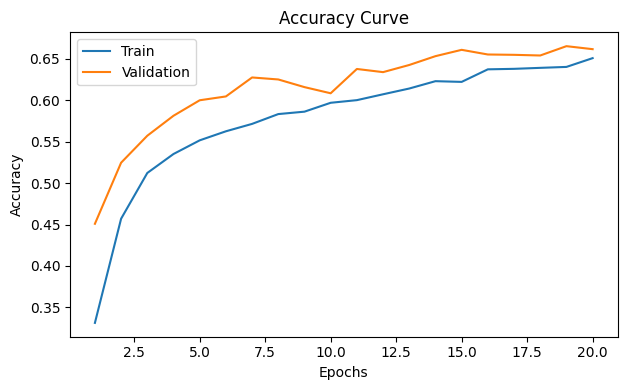

In [17]:
import matplotlib.pyplot as plt

# Retrieve the accuracy and loss values from the training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### **Evaluating the Model on the Test Set**

In [18]:
loss, accuracy = model.evaluate(test_set)

# Print the evaluation results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

4/4 [==============================] - 0s 32ms/step - loss: 0.8373 - accuracy: 0.6172
Test Loss: 0.8372602462768555
Test Accuracy: 0.6171875


**Observations and Insights:**
* This model's accuracy increases with the increase in the number of epochs.
* Given that the model shows similar patterns of accuracy across both the training and validation dataset, the model does not appear to be overfitting.
* The model noted reduced learning rate at 20 epochs, leading to early stopping.
* For 20 epochs, the model obtains an accuracy of about 65.1% for the training dataset, 66.2% for the validation dataset, and 61.7% for the test dataset. 

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Flatten, Dense

# Define the model
model_2 = Sequential()

# First Convolutional Block
model_2.add(Conv2D(256, kernel_size=2, padding='same', activation='relu', input_shape=(48, 48, 1)))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size=2))

# Second Convolutional Block
model_2.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size=2))

# Third Convolutional Block
model_2.add(Conv2D(64, kernel_size=2, padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size=2))

# Fourth Convolutional Block
model_2.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size=2))

# Flatten the output
model_2.add(Flatten())

# Dense Layers
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(4, activation='softmax'))

# Print the model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)     

### **Compiling and Training the Model**

In [20]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

In [21]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [23]:
#Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


In [24]:
# Define the number of epochs
epochs = 20

# Fit the model
history = model_2.fit(train_set, epochs=epochs, validation_data=validation_set, callbacks=callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2528 - accuracy: 0.4063

473/473 [==============================] - 24s 43ms/step - loss: 1.2528 - accuracy: 0.4063 - val_loss: 1.3311 - val_accuracy: 0.3329 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.0555 - accuracy: 0.5291

473/473 [==============================] - 19s 41ms/step - loss: 1.0552 - accuracy: 0.5294 - val_loss: 1.2683 - val_accuracy: 0.4101 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.9470 - accuracy: 0.5879

473/473 [==============================] - 20s 42ms/step - loss: 0.9470 - accuracy: 0.5879 - val_loss: 0.9762 - val_accuracy: 0.5750 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 0.8865 - accuracy: 0.6182

473/473 [==============================] - 20s 41ms/step - loss: 0.8861 - accuracy: 0.6183 - val_loss: 0.9293 - val_accuracy: 0.5986 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 0.8431 - accuracy: 0.6472

473/473 [==============================] - 20s 41ms/step - loss: 0.8431 - accuracy: 0.6472 - val_loss: 1.0599 - val_accuracy: 0.5541 - lr: 0.0010
Epoch 6/20
472/473 [============================>.] - ETA: 0s - loss: 0.8077 - accuracy: 0.6566

473/473 [==============================] - 20s 41ms/step - loss: 0.8077 - accuracy: 0.6565 - val_loss: 0.8285 - val_accuracy: 0.6466 - lr: 0.0010
Epoch 7/20
472/473 [============================>.] - ETA: 0s - loss: 0.7818 - accuracy: 0.6709

473/473 [==============================] - 20s 42ms/step - loss: 0.7818 - accuracy: 0.6708 - val_loss: 0.9248 - val_accuracy: 0.5933 - lr: 0.0010
Epoch 8/20
472/473 [============================>.] - ETA: 0s - loss: 0.7570 - accuracy: 0.6832

473/473 [==============================] - 20s 41ms/step - loss: 0.7569 - accuracy: 0.6834 - val_loss: 0.8128 - val_accuracy: 0.6626 - lr: 0.0010
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 0.7391 - accuracy: 0.6885

473/473 [==============================] - 20s 41ms/step - loss: 0.7391 - accuracy: 0.6885 - val_loss: 0.8591 - val_accuracy: 0.6363 - lr: 0.0010
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 0.7251 - accuracy: 0.6963

473/473 [==============================] - 20s 42ms/step - loss: 0.7251 - accuracy: 0.6963 - val_loss: 0.7944 - val_accuracy: 0.6747 - lr: 0.0010
Epoch 11/20
472/473 [============================>.] - ETA: 0s - loss: 0.7061 - accuracy: 0.7041

473/473 [==============================] - 20s 41ms/step - loss: 0.7062 - accuracy: 0.7040 - val_loss: 0.7776 - val_accuracy: 0.6807 - lr: 0.0010
Epoch 12/20
472/473 [============================>.] - ETA: 0s - loss: 0.6831 - accuracy: 0.7131

473/473 [==============================] - 20s 42ms/step - loss: 0.6833 - accuracy: 0.7132 - val_loss: 0.8184 - val_accuracy: 0.6522 - lr: 0.0010
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 0.6720 - accuracy: 0.7203

473/473 [==============================] - 20s 42ms/step - loss: 0.6720 - accuracy: 0.7203 - val_loss: 0.8630 - val_accuracy: 0.6492 - lr: 0.0010
Epoch 14/20
472/473 [============================>.] - ETA: 0s - loss: 0.6567 - accuracy: 0.7282

473/473 [==============================] - 20s 42ms/step - loss: 0.6564 - accuracy: 0.7282 - val_loss: 0.7594 - val_accuracy: 0.6924 - lr: 0.0010
Epoch 15/20
472/473 [============================>.] - ETA: 0s - loss: 0.6372 - accuracy: 0.7338

473/473 [==============================] - 20s 42ms/step - loss: 0.6375 - accuracy: 0.7338 - val_loss: 0.8007 - val_accuracy: 0.6787 - lr: 0.0010
Epoch 16/20
472/473 [============================>.] - ETA: 0s - loss: 0.6292 - accuracy: 0.7414

473/473 [==============================] - 20s 42ms/step - loss: 0.6293 - accuracy: 0.7413 - val_loss: 0.8575 - val_accuracy: 0.6701 - lr: 0.0010
Epoch 17/20
473/473 [==============================] - ETA: 0s - loss: 0.6066 - accuracy: 0.7476Restoring model weights from the end of the best epoch: 14.



Epoch 17: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 20s 42ms/step - loss: 0.6066 - accuracy: 0.7476 - val_loss: 0.8225 - val_accuracy: 0.6856 - lr: 0.0010
Epoch 17: early stopping


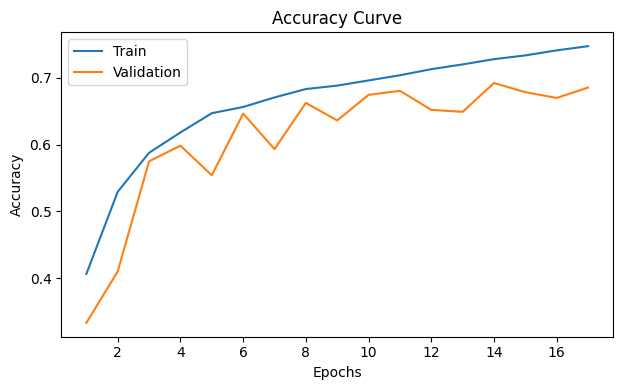

In [25]:
import matplotlib.pyplot as plt

# Retrieve the accuracy and loss values from the training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### **Evaluating the Model on the Test Set**

In [26]:
loss, accuracy = model_2.evaluate(test_set)

# Print the evaluation results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

4/4 [==============================] - 0s 34ms/step - loss: 0.8285 - accuracy: 0.6484
Test Loss: 0.8285192847251892
Test Accuracy: 0.6484375


**Observations and Insights:**
* This model's accuracy increases with the increase in the number of epochs.
* Although the model does not initially show similar patterns of accuracy across both the training and validation dataset, it begins to follow a similar pattern around the 6th epoch, which indicates that the model does not appear to be overfitting.
* The model noted reduced learning rate at 17 epochs, leading to early stopping.
* For 17 epochs, the model obtains an accuracy of about 74.8% for the training dataset, 68.6% for the validation dataset, and 64.8% for the test dataset. 

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [27]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

In [28]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [112]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_train.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_train.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [113]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Load the VGG16 model without the top (fully connected) layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the VGG16 base model
for layer in vgg16_base.layers:
    layer.trainable = False

# Get the output of the 'block5_pool' layer
block5_pool_output = vgg16_base.get_layer('block5_pool').output

# Add a Flatten layer
flatten_layer = Flatten()(block5_pool_output)

# Add Dense layers
dense_layer1 = Dense(512, activation='relu')(flatten_layer)
dropout1 = Dropout(0.5)(dense_layer1)
batch_norm1 = BatchNormalization()(dropout1)

dense_layer2 = Dense(256, activation='relu')(batch_norm1)
dropout2 = Dropout(0.5)(dense_layer2)
batch_norm2 = BatchNormalization()(dropout2)

dense_layer3 = Dense(128, activation='relu')(batch_norm2)
dropout3 = Dropout(0.5)(dense_layer3)
batch_norm3 = BatchNormalization()(dropout3)

# Add the last Dense layer
output_layer = Dense(4, activation='softmax')(batch_norm3)

# Create the model
model_3 = Model(inputs=vgg16_base.input, outputs=output_layer)

# Print the model summary
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### **Compiling and Training the VGG16 Model**

In [114]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Compile the vggmodel
model_3.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [115]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
  
train_set = train_datagen.flow_from_directory('/content/Facial_emotion_images/train',
                                              target_size=(224, 224),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              subset='training')

validation_set = train_datagen.flow_from_directory('/content/Facial_emotion_images/train',
                                                   target_size=(224, 224),
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   subset='validation')

test_set = test_datagen.flow_from_directory('/content/Facial_emotion_images/test',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 12089 images belonging to 4 classes.
Found 3020 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [35]:
epochs = 20

# Fit the model
history = model_3.fit(train_set,
                      validation_data=validation_set,
                      epochs=epochs,
                      verbose=1)

Epoch 1/20
378/378 [==============================] - 74s 175ms/step - loss: 1.6007 - accuracy: 0.3033 - val_loss: 1.2362 - val_accuracy: 0.3930
Epoch 2/20
378/378 [==============================] - 60s 159ms/step - loss: 1.2791 - accuracy: 0.3978 - val_loss: 1.1895 - val_accuracy: 0.4003
Epoch 3/20
378/378 [==============================] - 60s 160ms/step - loss: 1.2257 - accuracy: 0.4266 - val_loss: 1.2382 - val_accuracy: 0.4195
Epoch 4/20
378/378 [==============================] - 60s 158ms/step - loss: 1.2206 - accuracy: 0.4330 - val_loss: 1.4789 - val_accuracy: 0.2745
Epoch 5/20
378/378 [==============================] - 60s 159ms/step - loss: 1.1844 - accuracy: 0.4533 - val_loss: 1.3967 - val_accuracy: 0.2927
Epoch 6/20
378/378 [==============================] - 60s 159ms/step - loss: 1.1373 - accuracy: 0.4908 - val_loss: 1.2283 - val_accuracy: 0.4212
Epoch 7/20
378/378 [==============================] - 60s 158ms/step - loss: 1.1360 - accuracy: 0.4789 - val_loss: 1.3908 - val_ac

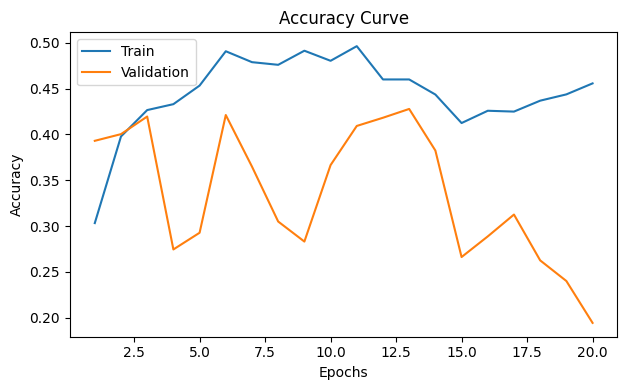

In [36]:
import matplotlib.pyplot as plt

# Retrieve the accuracy and loss values from the training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### **Evaluating the VGG16 model**

In [37]:
loss, accuracy = model_3.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 1s 124ms/step - loss: 1.7990 - accuracy: 0.2109
Test Loss: 1.7990038394927979
Test Accuracy: 0.2109375


**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**Observations and Insights:**
* The training and validation accuracies do not appear to show a pattern of improving perfomance of the model on the dataset. 
* The accuracy appears to significantly fluctuate on the validation data set
* This model does not fit the data well and provides a 45.6% accuracy on the training data, 19% accuracy on the validation data, and 21.1% accuracy on the test data 

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [116]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

In [117]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [118]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_train.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_train.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [119]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Load the pre-trained ResNet152V2 model
resnet = ResNet50V2(include_top=False, weights='imagenet', pooling='avg')

# Get the desired layer
transfer_layer_Resnet = resnet.output
transfer_layer_Resnet.trainable = False

# Add Dense layers
x = Dense(256, activation='relu')(transfer_layer_Resnet)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

# Add the last Dense layer
output_layer = Dense(4, activation='softmax')(x)

# Create the model
model_4 = Model(inputs=resnet.input, outputs=output_layer)

# Print the model summary
model_4.summary()


### **Compiling and Training the Model**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [126]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Compile the ResNet model
model_4.compile(optimizer=Adam(learning_rate=0.001),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])

In [128]:
history = model_4.fit(train_set, validation_data=(validation_set), epochs=epochs, callbacks=callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.5658 - accuracy: 0.2594

473/473 [==============================] - 65s 137ms/step - loss: 1.5658 - accuracy: 0.2594 - val_loss: 61.2339 - val_accuracy: 0.2425 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.4300 - accuracy: 0.2584

473/473 [==============================] - 62s 131ms/step - loss: 1.4300 - accuracy: 0.2584 - val_loss: 6.2804 - val_accuracy: 0.2254 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.3980 - accuracy: 0.2672

473/473 [==============================] - 62s 130ms/step - loss: 1.3980 - accuracy: 0.2672 - val_loss: 2.0547 - val_accuracy: 0.2455 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.3927 - accuracy: 0.2632

473/473 [==============================] - 61s 130ms/step - loss: 1.3927 - accuracy: 0.2632 - val_loss: 2.0999 - val_accuracy: 0.3512 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.3890 - accuracy: 0.2622

473/473 [==============================] - 62s 131ms/step - loss: 1.3890 - accuracy: 0.2622 - val_loss: 1.7168 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.3890 - accuracy: 0.2657

473/473 [==============================] - 62s 131ms/step - loss: 1.3890 - accuracy: 0.2657 - val_loss: 2.7289 - val_accuracy: 0.3546 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.3889 - accuracy: 0.2630

473/473 [==============================] - 61s 130ms/step - loss: 1.3889 - accuracy: 0.2630 - val_loss: 1.7952 - val_accuracy: 0.3520 - lr: 0.0010
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 1.3865 - accuracy: 0.2657Restoring model weights from the end of the best epoch: 5.



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 62s 131ms/step - loss: 1.3865 - accuracy: 0.2657 - val_loss: 1.8884 - val_accuracy: 0.2397 - lr: 0.0010
Epoch 8: early stopping


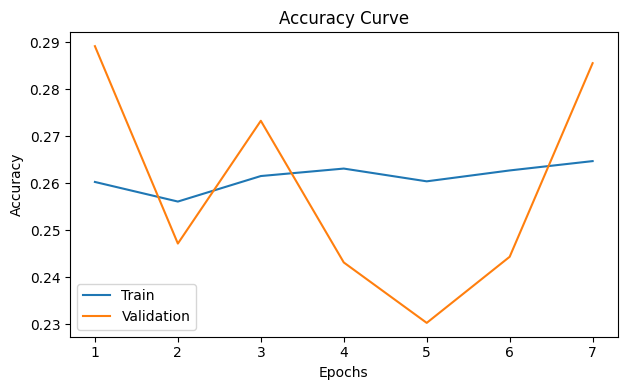

In [107]:
import matplotlib.pyplot as plt

# Retrieve the accuracy and loss values from the training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### **Evaluating the ResNet Model**

In [94]:
loss, accuracy = model_4.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 59ms/step - loss: 1.4024 - accuracy: 0.2422
Test Loss: 1.4024057388305664
Test Accuracy: 0.2421875


**Observations and Insights:**
* It appears that this model was neither able to perform on the train or the validation dataset. 

## **EfficientNet Model**

In [47]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

In [48]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [52]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 48, 48, 3)    0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 48, 48, 3)   0           ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization_1

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from efficientnet.tfkeras import EfficientNetB0
from keras.layers import GlobalAveragePooling2D

# Load the pre-trained EfficientNet model
EfficientNet = EfficientNetB0(weights='imagenet', include_top=False)

# Set the transfer layer
transfer_layer_EfficientNet = EfficientNet.get_layer('block6a_expand_activation')

# Freeze the weights of the pre-trained layers
EfficientNet.trainable = False

# Add GlobalAveragePooling2D layer
global_avg_pool = GlobalAveragePooling2D()(transfer_layer_EfficientNet.output)

# Add Dense layers and BatchNormalization layers
dense_layer1 = Dense(256, activation='relu')(global_avg_pool)
batchnorm_layer1 = BatchNormalization()(dense_layer1)
dropout_layer1 = Dropout(0.2)(batchnorm_layer1)

dense_layer2 = Dense(128, activation='relu')(dropout_layer1)
batchnorm_layer2 = BatchNormalization()(dense_layer2)
dropout_layer2 = Dropout(0.2)(batchnorm_layer2)

dense_layer3 = Dense(64, activation='relu')(dropout_layer2)
batchnorm_layer3 = BatchNormalization()(dense_layer3)
dropout_layer3 = Dropout(0.2)(batchnorm_layer3)

# Add the final Dense layer with 4 neurons and softmax activation function
output_layer = Dense(4, activation='softmax')(dropout_layer3)

# Create the model
model_5 = Model(inputs=EfficientNet.input, outputs=output_layer)

16804768/16804768 [==============================] - 1s 0us/step


### **Compiling and Training the Model**

In [56]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [57]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Compile the ResNet model
model_5.compile(optimizer=Adam(learning_rate=0.001),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])

In [58]:
#epochs
epochs = 20

# Fit the model
history = model_5.fit(train_set,
                    validation_data=validation_set,
                    epochs=epochs)

Epoch 1/20
378/378 [==============================] - 33s 72ms/step - loss: 1.2904 - accuracy: 0.4569 - val_loss: 2.1495 - val_accuracy: 0.2927
Epoch 2/20
378/378 [==============================] - 25s 67ms/step - loss: 1.0399 - accuracy: 0.5510 - val_loss: 5.5574 - val_accuracy: 0.2099
Epoch 3/20
378/378 [==============================] - 25s 66ms/step - loss: 0.9694 - accuracy: 0.5896 - val_loss: 2.2628 - val_accuracy: 0.4659
Epoch 4/20
378/378 [==============================] - 25s 66ms/step - loss: 0.9215 - accuracy: 0.6195 - val_loss: 1.4940 - val_accuracy: 0.4576
Epoch 5/20
378/378 [==============================] - 25s 66ms/step - loss: 0.9068 - accuracy: 0.6207 - val_loss: 1.2633 - val_accuracy: 0.5073
Epoch 6/20
378/378 [==============================] - 25s 66ms/step - loss: 0.8862 - accuracy: 0.6304 - val_loss: 1.0766 - val_accuracy: 0.5447
Epoch 7/20
378/378 [==============================] - 25s 66ms/step - loss: 0.8579 - accuracy: 0.6447 - val_loss: 0.9114 - val_accuracy:

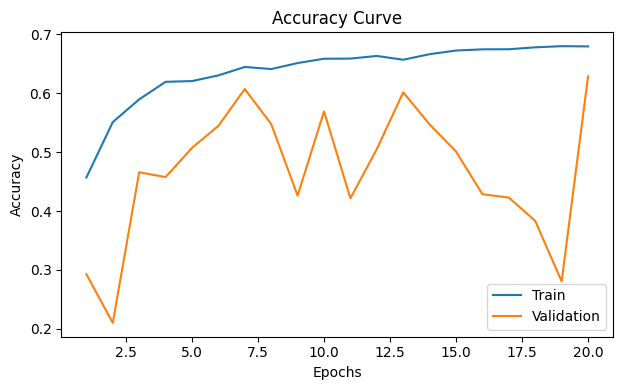

In [59]:
import matplotlib.pyplot as plt

# Retrieve the accuracy and loss values from the training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### **Evaluating the EfficientnetNet Model**

In [60]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

In [61]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [62]:
loss, accuracy = model_5.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 1s 51ms/step - loss: 0.7869 - accuracy: 0.6797
Test Loss: 0.7869241237640381
Test Accuracy: 0.6796875


**Observations and Insights:**

* The training and validation accuracies do not appear to show a pattern of improving perfomance of the model on the dataset.
* The accuracy appears to significantly fluctuate on the validation data set
* This model does not fit the data well and provides a 67.9% accuracy on the training data, 62.3% accuracy on the validation data, and 67.9% accuracy on the test data
* Though the final epoch showed consistent performance across test, validation, and train data, we can see that it does not perform consistently on the validation dataset as per the visualization 

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [108]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_train.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_train.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, LeakyReLU, Dropout

# Create the model_6
model_6 = Sequential()

# First Convolutional Block
model_6.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(48, 48, 1)))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(0.1))
model_6.add(MaxPooling2D(pool_size=2))
model_6.add(Dropout(0.2))

# Second Convolutional Block
model_6.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(0.1))
model_6.add(MaxPooling2D(pool_size=2))
model_6.add(Dropout(0.2))

# Third Convolutional Block
model_6.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(0.1))
model_6.add(MaxPooling2D(pool_size=2))
model_6.add(Dropout(0.2))

# Fourth Convolutional Block
model_6.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(0.1))
model_6.add(MaxPooling2D(pool_size=2))
model_6.add(Dropout(0.2))

# Fifth Convolutional Block
model_6.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(0.1))
model_6.add(MaxPooling2D(pool_size=2))
model_6.add(Dropout(0.2))

# Flatten the output for the Dense layers
model_6.add(Flatten())

# Dense layers
model_6.add(Dense(256))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))

model_6.add(Dense(512))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))

model_6.add(Dense(4, activation='softmax'))

# Compile the model_6 with your optimizer of choice
model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### **Compiling and Training the Model**

In [65]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 30

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [66]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Compile the CNN model
model_6.compile(optimizer=Adam(learning_rate=0.003),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])

In [67]:
history = model_6.fit(train_set, validation_data=validation_set, epochs=epochs, callbacks=callbacks_list)

Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.5060 - accuracy: 0.2704

473/473 [==============================] - 26s 42ms/step - loss: 1.5060 - accuracy: 0.2704 - val_loss: 1.5838 - val_accuracy: 0.1625 - lr: 0.0030
Epoch 2/30
472/473 [============================>.] - ETA: 0s - loss: 1.3750 - accuracy: 0.3126

473/473 [==============================] - 19s 40ms/step - loss: 1.3752 - accuracy: 0.3126 - val_loss: 1.2896 - val_accuracy: 0.3810 - lr: 0.0030
Epoch 3/30
472/473 [============================>.] - ETA: 0s - loss: 1.2457 - accuracy: 0.4037

473/473 [==============================] - 19s 40ms/step - loss: 1.2454 - accuracy: 0.4039 - val_loss: 1.4819 - val_accuracy: 0.3520 - lr: 0.0030
Epoch 4/30
472/473 [============================>.] - ETA: 0s - loss: 1.1340 - accuracy: 0.4876

473/473 [==============================] - 19s 40ms/step - loss: 1.1338 - accuracy: 0.4881 - val_loss: 1.2694 - val_accuracy: 0.3492 - lr: 0.0030
Epoch 5/30
472/473 [============================>.] - ETA: 0s - loss: 1.0570 - accuracy: 0.5350

473/473 [==============================] - 19s 40ms/step - loss: 1.0576 - accuracy: 0.5348 - val_loss: 1.2104 - val_accuracy: 0.4406 - lr: 0.0030
Epoch 6/30
472/473 [============================>.] - ETA: 0s - loss: 1.0078 - accuracy: 0.5573

473/473 [==============================] - 19s 40ms/step - loss: 1.0080 - accuracy: 0.5570 - val_loss: 1.0529 - val_accuracy: 0.5085 - lr: 0.0030
Epoch 7/30
472/473 [============================>.] - ETA: 0s - loss: 0.9741 - accuracy: 0.5806

473/473 [==============================] - 19s 41ms/step - loss: 0.9736 - accuracy: 0.5809 - val_loss: 0.9639 - val_accuracy: 0.5077 - lr: 0.0030
Epoch 8/30
472/473 [============================>.] - ETA: 0s - loss: 0.9452 - accuracy: 0.5985

473/473 [==============================] - 20s 41ms/step - loss: 0.9447 - accuracy: 0.5988 - val_loss: 1.0454 - val_accuracy: 0.5085 - lr: 0.0030
Epoch 9/30
472/473 [============================>.] - ETA: 0s - loss: 0.9154 - accuracy: 0.6122

473/473 [==============================] - 20s 42ms/step - loss: 0.9153 - accuracy: 0.6122 - val_loss: 1.0838 - val_accuracy: 0.4605 - lr: 0.0030
Epoch 10/30
473/473 [==============================] - ETA: 0s - loss: 0.9209 - accuracy: 0.6085Restoring model weights from the end of the best epoch: 7.



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0006000000052154065.
473/473 [==============================] - 21s 44ms/step - loss: 0.9209 - accuracy: 0.6085 - val_loss: 1.0298 - val_accuracy: 0.4909 - lr: 0.0030
Epoch 10: early stopping


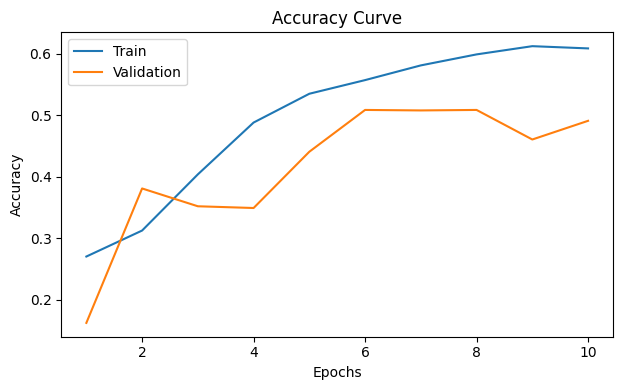

In [68]:
import matplotlib.pyplot as plt

# Retrieve the accuracy and loss values from the training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### **Evaluating the Model on Test Set**

In [109]:
loss, accuracy = model_6.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 39ms/step - loss: 0.9823 - accuracy: 0.4844
Test Loss: 0.9822700023651123
Test Accuracy: 0.484375


**Observations and Insights:**
* This model's accuracy increases with the increase in the number of epochs.
* Given that the model shows similar patterns of accuracy across both the training and validation dataset, the model does not appear to be overfitting.
* The model noted reduced learning rate at 10 epochs, leading to early stopping.
For 10 epochs, the model obtains an accuracy of about 60.8% for the training dataset, 49.0% for the validation dataset, and 48.4% for the test dataset.

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.25      0.25      0.25        32
           2       0.28      0.28      0.28        32
           3       0.84      0.84      0.84        32

    accuracy                           0.52       128
   macro avg       0.52      0.52      0.52       128
weighted avg       0.52      0.52      0.52       128



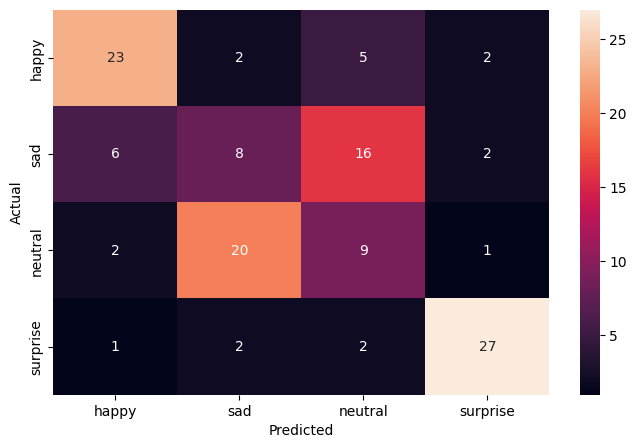

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Printing the classification report
report = classification_report(y_true, pred)
print("Classification Report:")
print(report)

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Based on model performance, I decided to pick model 1 because it performed most consistently and with the highest level of accuracy. However, it is important to note that none of the models I created was successful in determining facial expressions with higher than a 62% accuracy

**Observations and Insights:**

* The model correctly predicts "surprise" and "happy" images with the highest level of accuracy compared to "sad" and "neutral". 
* Additionally, The model frequently confuses "neutral" with "sad" and vice versa. 

## **Conclusion:**
Determining facial expressions is an abstract task that results in error even in humans. 

Creating several models and determining the unique parameters that allow for optimization in itself is an arduous task that requires multiple iterations and attempts.  However, as I continue to iterate and attempt various combinations of parameters, hopefully I will be able to achieve a model that performs with a higher level of accuracy. 

### **Refined insights**:
- Knowing that the first model most commonly confused "sad" and "neutral" highlights an interesting phenomenon: In human nature, these facial expressions may present themselves similarly, which makes it more difficult to correctly predict. Perhaps the model is conflating the two due to their visual similarity and requires more specificity to determine differences between the two. 

### **Comparison of various techniques and their relative performance**:
- The first and second CNN models performed the best out of all the models I attempted, with the first model performing more consistently out of the two. 
- There is still absolutely scope to improve the model's performance, as it is still only performing at around 62% on the test data. 
- The poorest performing technique was the ResNet model, followed by the VGG model. 

### **Proposal for the final solution design**:
* While none of the models performed with a high level of accuracy, if I had to pick a model to pick for the final solution design, I would choose the first model I made. 
* This is because it performed most consistently and with the highest level of accuracy. Knowing that the model most consistently conflates "sad" and "neutral" is also helpful in understanding the nature of errors the model is making. 